In [10]:
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pytorch_lightning as pl
import sys
sys.path.append('../..')
import torch

from src.utils import bw_map_data_generator as map_gen
from src.utils import inference as inf

In [11]:
# create resized image from map
image_path = '0311_map.png'
target_size_x = 64
target_size_y = 64
map_gen.resize_and_pad(
    image_path = image_path, 
    target_size_x = target_size_x, 
    target_size_y = target_size_y
)

# create start image
start_filename = 'start_map'
start_point_x = 16
start_point_y = 10
map_gen.create_start_or_goal_image(
    x_point = start_point_x, 
    y_point = start_point_y, 
    filename = start_filename, 
    target_size_x = target_size_x, 
    target_size_y = target_size_y
)

# create start image
goal_filename = 'goal_map'
goal_point_x = 16
goal_point_y = 30
map_gen.create_start_or_goal_image(
    x_point = goal_point_x, 
    y_point = goal_point_y, 
    filename = goal_filename, 
    target_size_x = target_size_x, 
    target_size_y = target_size_y
)

(0, 255)
(0, 32)
Image resized!
Image created successfully!
Image created successfully!


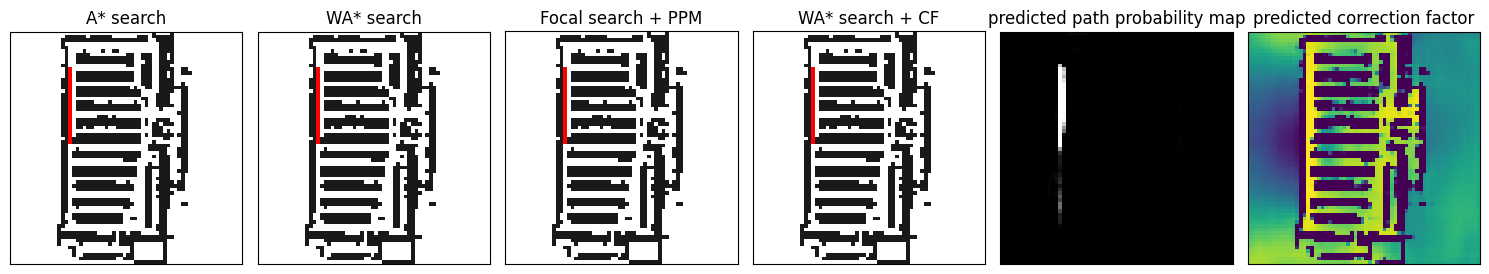

In [12]:
results = inf.infer_path()
fig, ax = plt.subplots(1, 6, figsize=(15, 7))

ax[0].imshow(
    inf.transform_plan(torch.moveaxis(torch.cat(
        [results['map_design'], results['outputs_vanilla'].paths, results['outputs_vanilla'].histories - results['outputs_vanilla'].paths], dim=1)[0], 0, 2)
                    ))
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title(f'A* search')

ax[1].imshow(
    inf.transform_plan(torch.moveaxis(torch.cat(
        [results['map_design'], results['outputs_w2'].paths, results['outputs_w2'].histories - results['outputs_w2'].paths], dim=1)[0], 0, 2)
                    ))
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title(f'WA* search')

ax[2].imshow(
    inf.transform_plan(torch.moveaxis(torch.cat(
        [results['map_design'], results['outputs_fw100'].paths, results['outputs_fw100'].histories - results['outputs_fw100'].paths], dim=1)[0], 0, 2)
                    ))
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title(f'Focal search + PPM')

ax[3].imshow(
    inf.transform_plan(torch.moveaxis(torch.cat(
        [results['map_design'], results['outputs_cf'].paths, results['outputs_cf'].histories - results['outputs_cf'].paths], dim=1)[0], 0, 2)
                    ))
ax[3].set_xticks([])
ax[3].set_yticks([])
ax[3].set_title(f'WA* search + CF')

ax[4].imshow(results['pred_f'][0, 0], cmap='gray')
ax[4].set_xticks([])
ax[4].set_yticks([])
ax[4].set_title(f'predicted path probability map')

ax[5].imshow(results['pred_cf'][0, 0])
ax[5].set_xticks([])
ax[5].set_yticks([])
ax[5].set_title(f'predicted correction factor')

plt.tight_layout()
plt.show()